# day 431-433

[Read me to understand where Fourier Transform is used 🐒🐒🐒](https://www.tek.com/en/support/faqs/what-fft-fast-fourier-transform-math-function-oscilloscope-useful)


## what is Nyquist frequency?
* Nyquist is a term used in computer science and engineering to describe the maximum frequency that can be represented/modelled without aliasing in a signal(without aliasing means without seeing errors in the signal). It's also known as the Nyquist frequency, Nyquist limit, or Shannon sampling frequency. 

# The Goal: to isolate the signal from the noise.

![sfs](images/170824_sig.png)

* lets say you read signals from different sensors. Each sensor's signals come with unique different frequencies then you can apply spectral seperation techniques(filtering) to seperate each signal and its source as clear as day and night.
* but lets say you read signals from different sensors and each sensor's signals come with same(ish) frequency, they are close and identical then you cannot apply any spectral seperation technique or filtering to distinguish them out. it would be too hard or even impossible.


![sfs](images/170824_sig1.png)
* orange is noise and blue is the signal.
* can you isolate the signal from the noise in this case?
* yeah we can but only partially. we can apply low pass filter to the right side of the noise to attenuate it and high pass filter to the left side of the signal to attenuate the noise.
* yet we will have some noise mixed with the signal in the middle that the fourier transform might have considered some of the noise into frequencies that might affect the real frequencies of the True signal from the sensor.

## obliteration of unwanted parts of the signal in the frequency domain.
![sfs](images/170824_sig2.png)
* blue is the original signal from the sensor
* orange is the filtered version of it.
* we apply some fourier transform to the signal only after a threshold.
* some high band pass is used to filter only the part of the signal that's beyond some points in x coordinate (lets say beyond 25) and everything below it is totally obliterated(zeroed out).


## High-pass filtering and Low-pass filtering:
## Assessing the Understanding of High-Pass and Low-Pass Filtering:.

### Key Points:

1. **High-pass and Low-pass Filters:**
   - **High-pass filters:** Allow high-frequency signals to pass through while attenuating low-frequency signals.
   - **Low-pass filters:** Allow low-frequency signals to pass through while attenuating high-frequency signals.
   - **Amplitude is not the primary factor:** The primary factor determining whether a signal passes or is attenuated is its frequency, not its amplitude.

2. **Audio Examples:**
   - **Hiss removal:** Hisses are typically high-frequency sounds. Therefore, to remove them, you would use a **low-pass filter** to attenuate the high frequencies.
   - **Heartbeat analysis:** Heartbeats are typically low-frequency signals. To isolate them from higher-frequency noise, you would use a **high-pass filter** to at lowte the high frequencies.

### Corrected Statement:

* **High-pass filtering:** Used to filter out **low-frequency** signals.
* **Low-pass filtering:** Used to filter out **high-frequenc

**In summary, the choice between high-pass and low-pass filtering depends on the frequency content of the signal you want to isolate or remove.** The amplitude of the signal is not directly relevant to the filter's function.

## using a kernel to get the weighted combination of filtered signal: Time domain
![sfs](images/170824_sig3.png)


* ta he kernel could be taper like the hann window we have seen in the spectral and rhymicity section or a sinwave based one.

### FIR:
* this is useful for working with sig.nals in Time domain
* suppose we want to isolate the low frequencies from the high frequencies of the original signal then we window that signal into different parts and run our kernel over it and then we would take the weighted combination of it(sum and divide by n) to get the corresponding filtered signal.


### IIR:
* this works similar to FIR the only difference being is that it is we apply a kernel not only to the original signal and take a weighted combination of it but we would apply the kernel once again to the filtered signal and takionweighted combinated of each window of the filter as well.

## Procedures to filter the signal:
![sfsd](images/190824_sig.png)


## example:
![sfsd](images/190824_sig1.png)

## comparing FIR with IIR:
![sfs](images/190824_sig2.png)
* the speed of FIR is comparitively slower than IIR filter. the unit of speed is 'order'; the fir might take 1000's of datapoints so its speed is order 1000 and iir might take some 5 datapoints or 6 datapoints so its speed is 5 order or 6 order, it is also known as window size.
* FIR can be applied to offline data training, for online training due to the possibility of infinite amount of incoming data we normally would apply IIR.

* the reason for the stability is because in FIR we multiply the original data with the kernel but in IIR we multiply the original data with itself. it is because in IIR since we multiply with the data itself the data might inherently have values that can amplify and project forward in Time that can affect other data in the spectrum and therefore affect the quality of the analysis.

# day 434

# FIR filters with firls

![sfsd](images/190824_sig4.png)
* **DC** begins with 0
* **Nquist** is at 1.
* you want to have only curvy or non-sharp edges of the data as sharp edges would consume a lot of energy for fourier transform algorithm to represent it since it is difficult for sine wave to create a sharp edged box like structure as shown in the picture(sine waves are best at creating curvy surfaces) leading to poor representation of the actual data, or it would create a poor filter, edges of which you'd see being disoriented.
* **Gain values would only take 0 or 1:**. 1's where you would allow the signals to pass through and 0 is where you would attenuate and lock the spectral features of the signal.
* **Transition zones:** are specified in terms of percentage(%) of frequency.

# day 435 - 444

## overall goal:
* the goal is to use FFT(Fast Fourier Transform) to fit a signal's plot.
* the signal's plot will look like a box with sharp edges.
* it would be interesting to see how fourier transform being a sin wave (known to represent/recreate curvy surfaces) is going to produce a box with sharp edges
* the sharp edges are the interesting part here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import copy
from scipy import signal

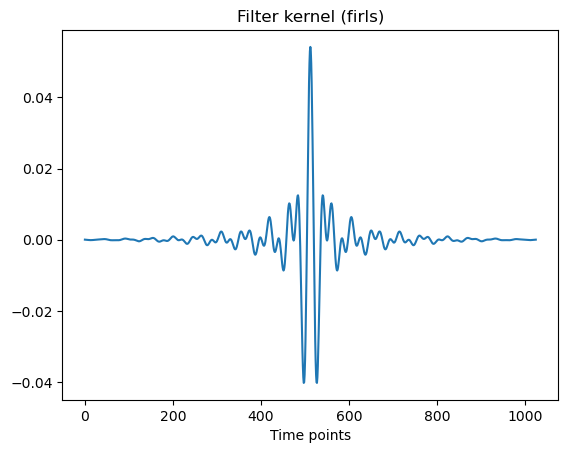

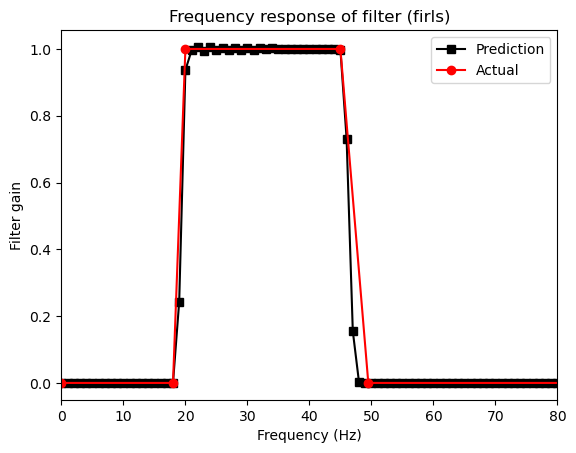

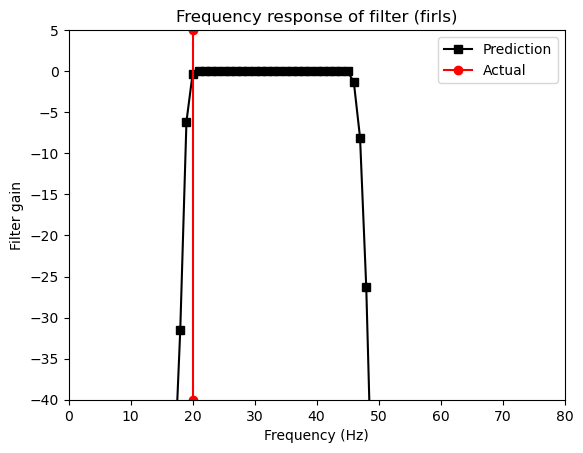

In [12]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45] # frequency range
transw  = .1 # manipulate this transistion width if you set it high, you will to steep filter signal and if you set it low, you will get a gentle generalizable filter signal but it will be imprecise. so striking a balance between the two is the way to go.

scaler = 20 # you can play with this scaler to see how it makes our prediction match the actual signal.
order   = int( scaler*srate/frange[0] ) # # of datapoints you want to have in your window. a.k.a number of taps in the data

# order must be odd
if order%2==0:
    order += 1

# bands: frex is a monotonic non-decreasing sequence containing band edges.
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ] 

# define filter shape;A sequence the same size as `bands` containing the desired gain at the start and end point of each band.
shape = [ 0, 0, 1, 1, 0, 0 ]

# filter kernel; firls means fir least square
filtkern = signal.firls(numtaps=order,bands=frex,desired=shape,fs=srate) # this is how we creatte the kernel which is gonna get the weighted sum of the original signal

# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Prediction')
plt.plot(frex,shape,'ro-',label='Actual')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Prediction')
plt.plot([frange[0],frange[0]],[-40,5],'ro-',label='Actual')
plt.xlim([0,frange[0]*4])
plt.ylim([-40,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

**Interesting conclusion:** with 15 as a scaler we can better have our sensor represent the actual signal from the brain waves that means we can, close to 100%, translate someone's thoughts into actions via Brain computer interfaces.

* logorithmic scaled picture shows the discrepency between actual and prediction at the sharp edge as the black line(predictio) is deviating away from the actual red signal.

## exploration, ablation-analysis and freethrows

In [11]:
2**10

1024

In [7]:
order

257

In [15]:
frex  # know what is frex for?

[0, 18.0, 20, 45, 49.5, 512.0]

In [18]:
shape

[0, 0, 1, 1, 0, 0]

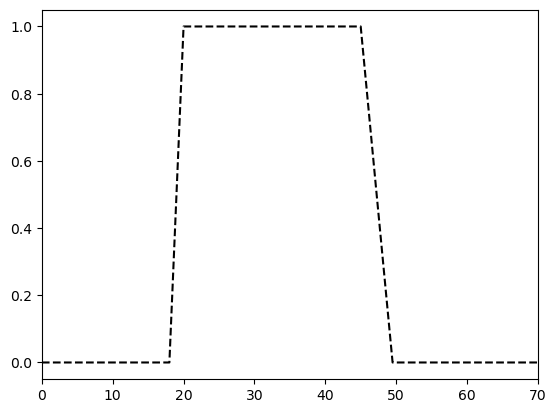

In [24]:
# you can see now where it comes from
plt.plot(frex,shape,'k--')
plt.xlim([0,70])
plt.show()

### conclusion:
* the filter order is the number of time points in the filter. Therefore a filter kernel with a higher order(number of time points) will have better frequency resolution.
* the number of timepoinst in the filter is increased with increasing the number of orders which can be scaled to accomodate more data points.

## Testing with multiple kernels with different orders,frex and shape.

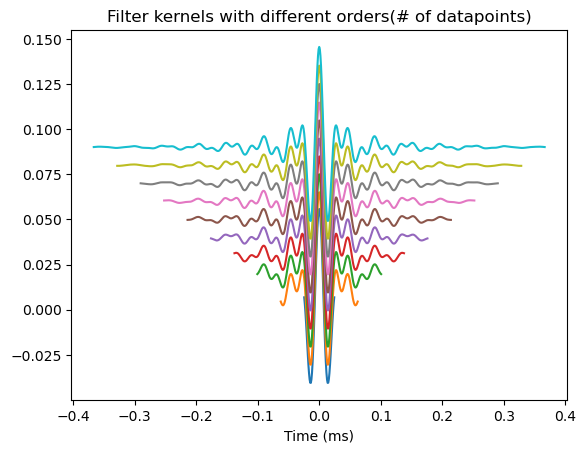

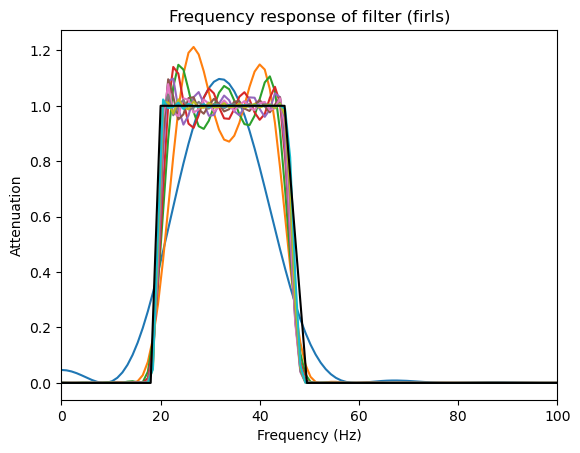

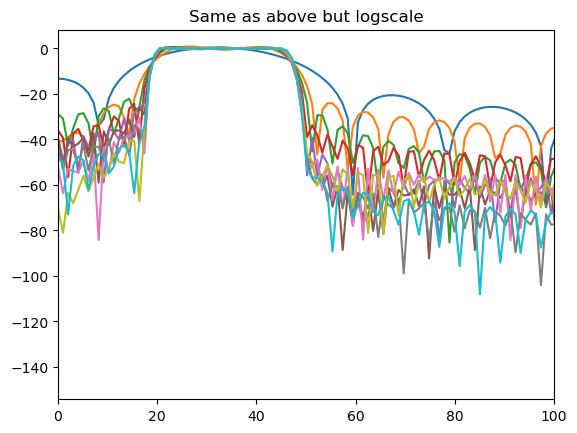

In [16]:
## effects of the filter kernel order
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45] # frequency range
transw  = 0.1

scaler = 15 # you can play with this scaler to see how it makes our prediction match the actual signal.

# range of orders:
ordersF = ( 1*srate/frange[0]) / (srate/1000)
ordersL = (15*srate/frange[0]) / (srate/1000) 

orders = np.round( np.linspace(ordersF,ordersL,10) ) # range of orders to experiment with

# initialize
fkernX = np.zeros((len(orders),1000)) # shape is 10x1000
hz = np.linspace(0,srate,1000) # between 0 and 1024


for oi in range(0,len(orders)):
    
    # make sure order is odd-length 
    ord2use = orders[oi]+(1-orders[oi]%2) # algorithm for converting evens to odds.
    
    # create filter kernel
    fkern = signal.firls(numtaps=ord2use,bands=frex,desired=shape,fs=srate) # we use the same frex,shape,srate we used before

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders(# of datapoints)')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()

### conclusion: 
* The things to optimize are:
1. order
2. transition width 

* **most important thing to note is if we have sharp edge(created by the signal falling from some magnitude to 0 abruptly) then applying FIR_LS filter to it would create ripple effect artifact where the sudden fall is observed like you see in the logarithmically scaled plot in the above picture.**

## exploration, ablation-analysis and freethrows

In [44]:
ordersF

500.0

In [46]:
1*50

50

In [48]:
ordersL

7500.0

In [50]:
15*50

750

In [27]:
# previously we had only 257 orders now we have a range of orders to experiment with
orders # from 50 to 750 

array([ 50., 128., 206., 283., 361., 439., 517., 594., 672., 750.])

In [31]:
orders[0]%2

0.0

In [29]:
# algorithm to converting evens to odds
orders[0] + (1-orders[0]%2)

51.0

In [33]:
orders[3]%2

1.0

In [ ]:
orders[3] % (1-orders[3]%2)

In [35]:
ord2use

751.0

In [35]:
even = 24
24 + (1-24%2)

25

In [37]:
# if it was odd
odd = 25
25 + (1-25%2)

25

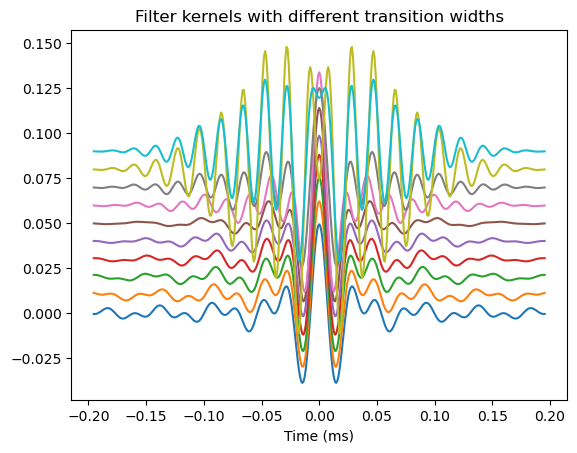

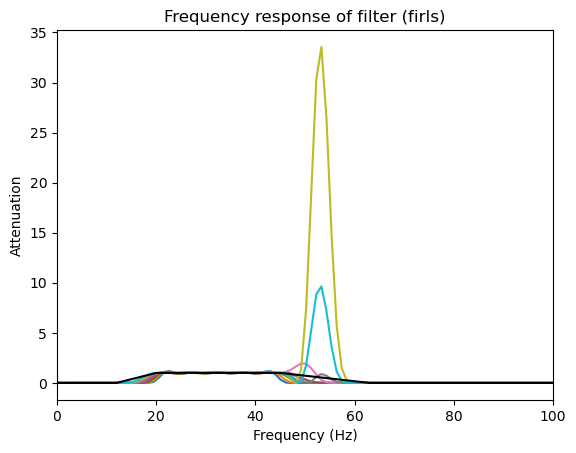

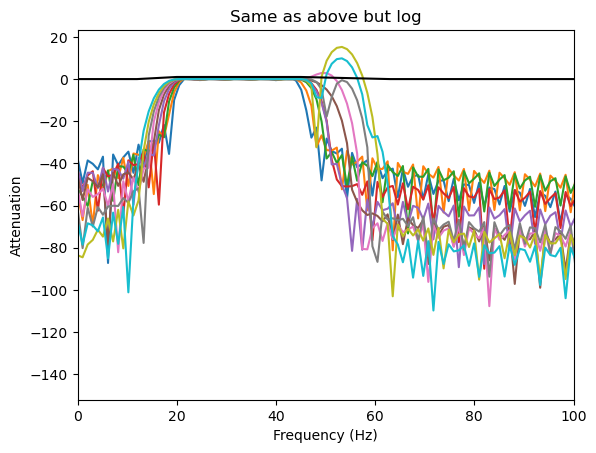

In [18]:
## effects of the filter kernal with transition width

# range of transitions:
transwidths = np.linspace(.01,.4,10)

# initialize:
fkernX = np.zeros((len(transwidths),1000))
hz = np.linspace(0,srate,1000)

for ti in range(0,len(transwidths)):
    
    # create filter kernel
    frex  = [ 0, frange[0]-frange[0]*transwidths[ti], frange[0], frange[1], frange[1]+frange[1]*transwidths[ti], nyquist ]
    fkern = signal.firls(401,frex,shape,fs=srate) # keeping the orders constant at 401
    n     = len(fkern)

    # take its FFT
    fkernX[ti,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,401)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*ti)
    
plt.xlabel('Time (ms)')
plt.title('Filter kernels with different transition widths')
plt.show()


plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()


plt.plot(hz,10*np.log10(fkernX.T))
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Same as above but log')
plt.show()

# day 444

# FIR filter with fir-1

![fsdfs](images/020924_sig.jpg)

* unlike with FIR_LS(fir least square) where there was a transition zone when the signal bandwidth dropped from magnitude 1 to magnitude 0, there is no transition zone in fir-1 since it immediately brings the signal point from the higher magnitude to zero without forming that legendary sloped transition zone.
* we also don't have to pass in [0,0,1,1,0,0] for shapes as with fir_ls we just have to pass in [1,1] the fir_1 will take care of the rest.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import copy
from scipy import signal

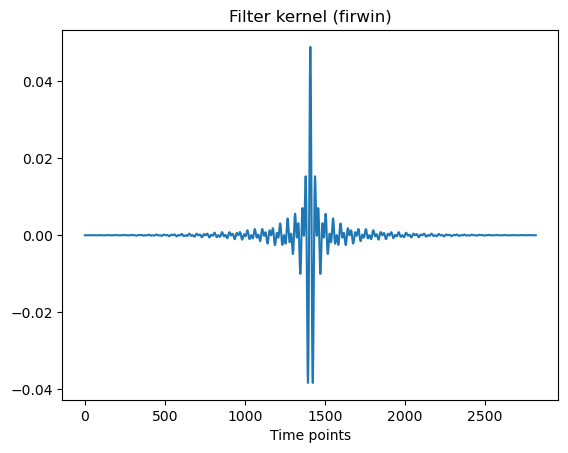

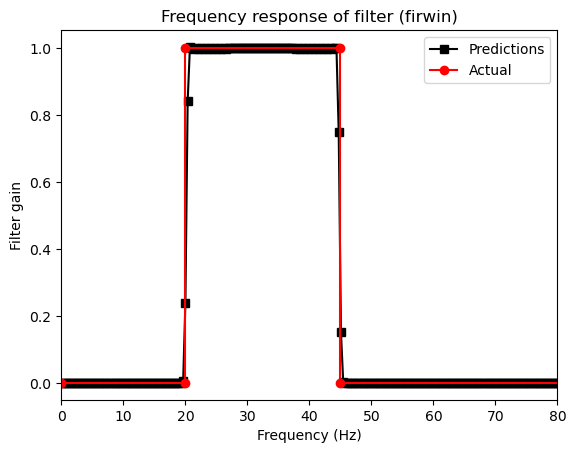

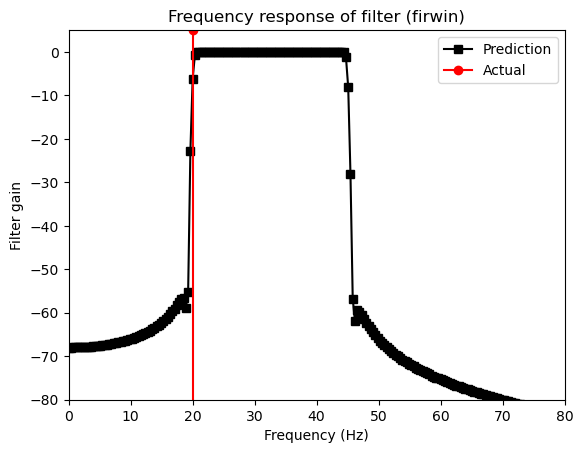

In [6]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 55*srate/frange[0] )

# force odd order
if order%2==0:
    order += 1

### --- NOTE: Python's firwin corresponds to MATLAB's fir1 --- ###

# filter kernel
filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firwin)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2

# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Predictions')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Actual')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Prediction')
plt.plot([frange[0],frange[0]],[-100,5],'ro-',label='Actual')
plt.xlim([0,frange[0]*4])
plt.ylim([-80,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()

# 446-447

# IIR Butterworth Filter

* why is it called IIR Butterworth filter?
* IIR stands for infinite impulse response.

## bard's explanation:
The name "IIR Butterworth filter" comes from two components:

1. **IIR (Infinite Impulse Response):** This indicates the filter's behavior. IIR filters have an impulse response that theoretically extends to infinity, meaning that their output is influenced by both the current input and past inputs. This makes IIR filters more efficient to implement in hardware but can introduce phase distortion.

2. **Butterworth:** This refers to the specific mathematical function used to design the filter. The Butterworth filter is characterized by its flat passband and monotonic roll-off in the stopband. This makes it a popular choice for applications where a smooth transition between passband and stopband is desir
## what are passband and stopband? with pictorial examples:
### Passband and Stopband in a Frequency Response

**Passband:** This is the range of frequencies that a filter allows to pass through with minimal attenuation. 
**Stopband:** This is the range of frequencies that a filter attenuates or blocks.

**Visual Representati

![Image](https://cdn.everythingrf.com/live/pass-band-ripple-filter_636793555771281995.png)
pband]

In this plot, the x-axis represents frequency, and the y-axis represents the magnitude response of the filter (usually in decibels). The passband is the region where the magnitude is close to 0 dB (meaning minimal attenuation), and the stopband is the region where the magnitude is significantly below 0 dB (meaning significant attenuat#ion).

## Butterworth Filter Applied to a Frequency Response

A Butterworth filter is designed to have a maximally flat passband, meaning it allows frequencies within the passband to pass through with minimal distortion. In the stopband, the attenuation increases monotonically.

**Visual Rep![Image](https://se.mathworks.com/help/examples/signal/win64/AnalogIIRLowpassFiltersExample_01.png)ae stopband.
l-off.


## How to design and evaluate Butterworth filter kernels:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy

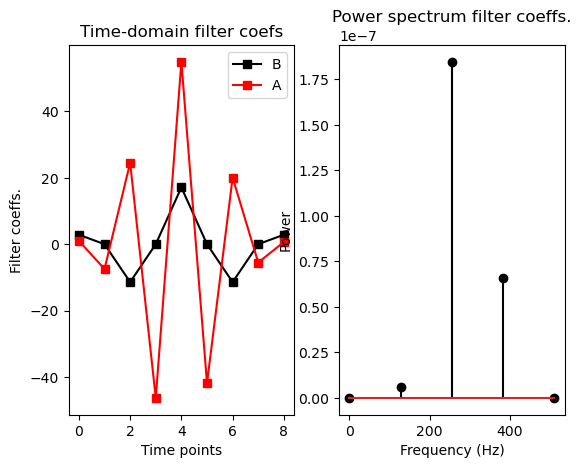

In [37]:

# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]

# create filter coefficients
"""fkernB: previous weights of the original signal.
   fkernA: previous weights of the already fitered signal (which is the previous weights of fkernB).
"""
fkernB,fkernA = signal.butter(4,np.array(frange)/nyquist,btype='bandpass') # order is 4

# power spectrum of filter coefficients
filtpow = np.abs(scipy.fftpack.fft(fkernB))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(fkernB)/2)+1))


# plotting
plt.subplot(121)
plt.plot(fkernB*1e5,'ks-',label='B')
plt.plot(fkernA,'rs-',label='A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

plt.subplot(122)
plt.stem(hz,filtpow[0:len(hz)],'ks-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum filter coeffs.')
plt.show()

## exploration, ablation & meta-analysis, and freethrows

In [20]:
frange

[20, 45]

In [22]:
nyquist

512.0

In [18]:
np.array(frange)/nyquist # vectorization

array([0.0390625 , 0.08789062])

In [24]:
fkernB

array([ 2.85382590e-05,  0.00000000e+00, -1.14153036e-04,  0.00000000e+00,
        1.71229554e-04,  0.00000000e+00, -1.14153036e-04,  0.00000000e+00,
        2.85382590e-05])

In [26]:
fkernA

array([  1.        ,  -7.47070105,  24.5461211 , -46.32666325,
        54.9307302 , -41.90211103,  20.08174376,  -5.52856114,
         0.66944249])

In [31]:
filtpow

array([0.00000000e+00, 6.07623958e-09, 1.84461862e-07, 6.59690104e-08,
       3.90398727e-11, 3.90398727e-11, 6.59690104e-08, 1.84461862e-07,
       6.07623958e-09])

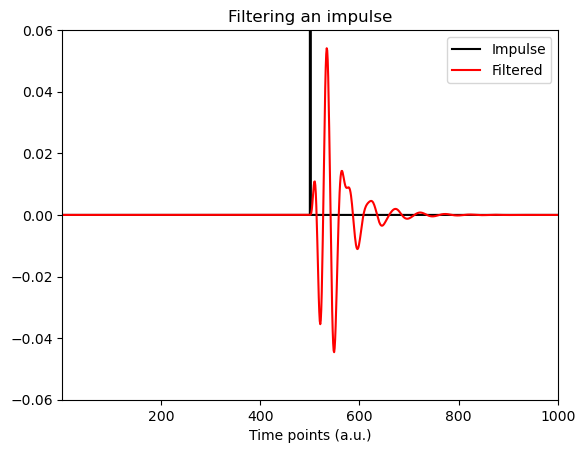

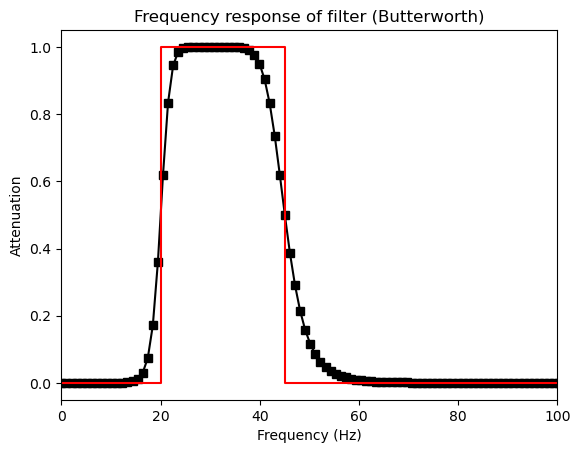

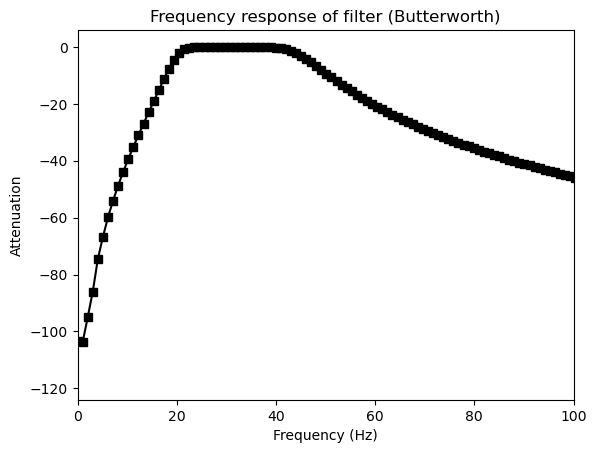

In [33]:
## how to evaluate an IIR filter: filter an impulse

# generate the impulse
impres = np.zeros(1001)
impres[501] = 1

# apply the filter
fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)

# compute power spectrum
fimpX = np.abs(scipy.fftpack.fft(fimp))**2
hz = np.linspace(0,nyquist,int(np.floor(len(impres)/2)+1))


# plot
plt.plot(impres,'k',label='Impulse')
plt.plot(fimp,'r',label='Filtered')
plt.xlim([1,len(impres)])
plt.ylim([-.06,.06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')
plt.show()

plt.plot(hz,fimpX[0:len(hz)],'ks-')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()


plt.plot(hz,10*np.log10(fimpX[0:len(hz)]),'ks-')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

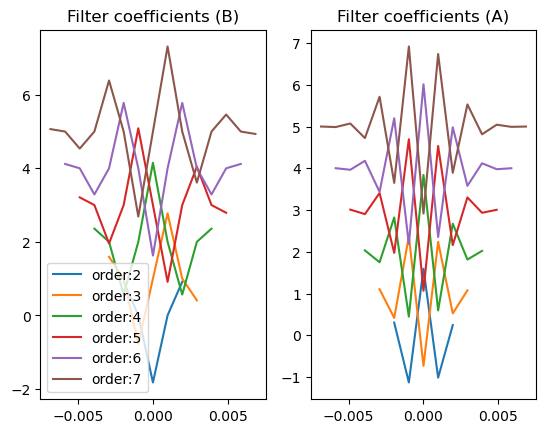

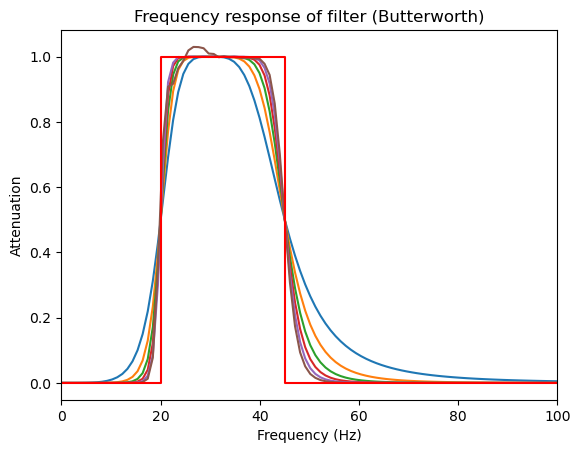

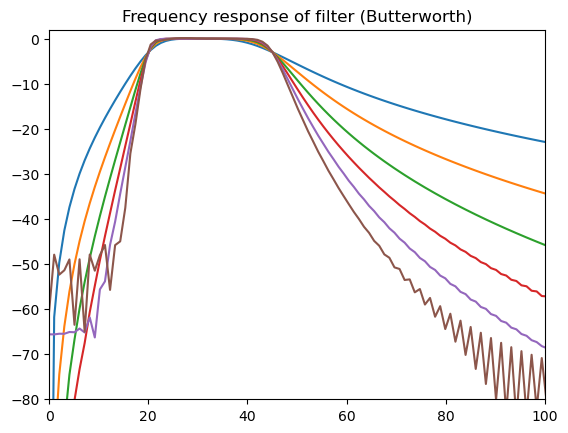

In [55]:
## effects of order parameter

orders = range(2,8)

fkernX = np.zeros((len(orders),1001))
hz = np.linspace(0,srate,1001)


# loop over orders
for oi in range(0,len(orders)):
    
    # create filter kernel
    fkernB,fkernA = signal.butter(orders[oi],np.array(frange)/nyquist,btype='bandpass')
    n = len(fkernB)
    
    # filter the impulse response and take its power
    fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fimp))**2
    
    
    # show in plot
    time = np.arange(0,len(fkernB))/srate
    time = time - np.mean(time)
    plt.subplot(121)
    plt.plot(time,scipy.stats.zscore(fkernB)+oi,label='order:{}'.format(orders[oi]))
    plt.title('Filter coefficients (B)')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(time,scipy.stats.zscore(fkernA)+oi)
    plt.title('Filter coefficients (A)')


plt.show()


# plot the spectra
plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

# in log space
plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth)')
plt.show()

## observation about the above plot: 
* At the order of 7(the brown color line) the filtered signal seems to leak outside the red box(the original signal) meaning it is misrepresenting.
* the purple is the best. it is favourable.

## conclusion
* IIR filters can never be better than FIR filters. it can be as close as possible but never better. since we got those curvy representation of the actual signal but FIR can actually get close to the original signal, and in FIR you get better spectral resolution.
* IIR filters can be bad because it relies on the values of the filtered signal(fkernA) to get the final output signal(fkernB). if there was any artifact or noise in the filtered signal(fkernA) it might leak into the final output signal as well which might distort the result.
* IIR filters are better because of their less computation cost compared to FIR filters.

## when to use what; FIR or IIR?
* if you are doing online analysis(where you get your data updated so frequently) and when you want to do quick and dirty analysis then go with IIR filtering the signal.
* if you are doing offline analysis (where the data doesn't get updated as frequently but seasonally you may prefer to update to reflect the reality as is) then go with FIR filtering the original signal.

In [51]:
np.array(frange)/nyquist

array([0.0390625 , 0.08789062])

# day 449

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import copy


# Cause and Zero phase-shift filter signals

![fsdfs](images/090924_sig.jpg)

## interpretation:
* causal filter is also knowns as forward filtering
* the filtered signal is created by taking a weighted comibination of the original signal (say in the range of 25 data points) and running a kernal over it to create the filterd signal.

# zero-phase filtering the signal:
* first apply the causal filter to filter the signal forward in time.
* then filter that filtered signal backwards in time.
* then flip the backward filtered signal to get zero-phase filter.
* so, there are in total 3 filters.


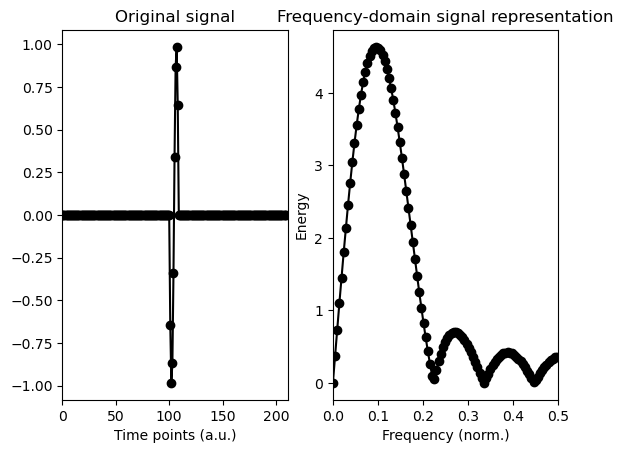

In [3]:
# create a simple signal
data = np.concatenate((np.zeros(100),np.cos(np.linspace(np.pi/2,5*np.pi/2,10)),np.zeros(100)),axis=0)
n = len(data)

# plot it and its power spectrum
plt.subplot(121)
plt.plot(range(0,n),data,'ko-')
plt.xlim([0,n+1])
plt.title('Original signal')
plt.xlabel('Time points (a.u.)')

plt.subplot(122)
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(data)),'ko-')
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency-domain signal representation')
plt.show()

In [19]:
data.shape

(210,)

In [17]:
data[50:120]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.12323400e-17, -6.42787610e-01,
       -9.84807753e-01, -

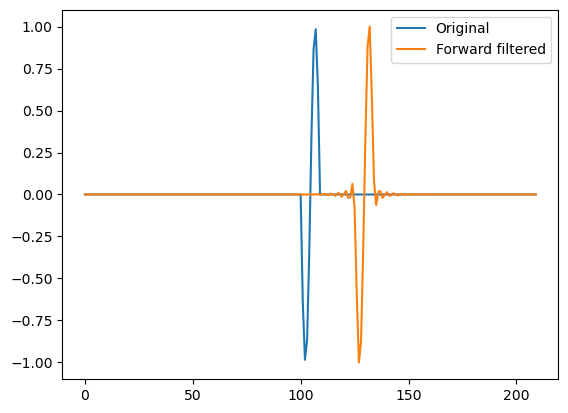

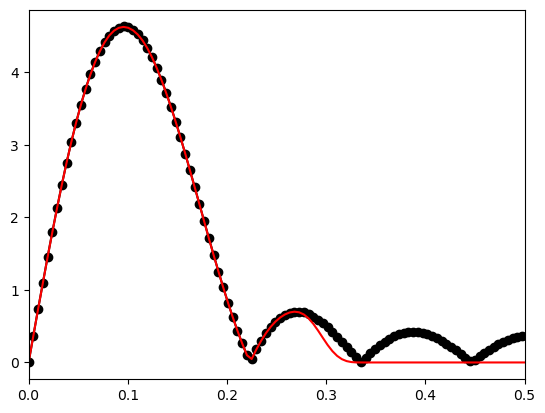

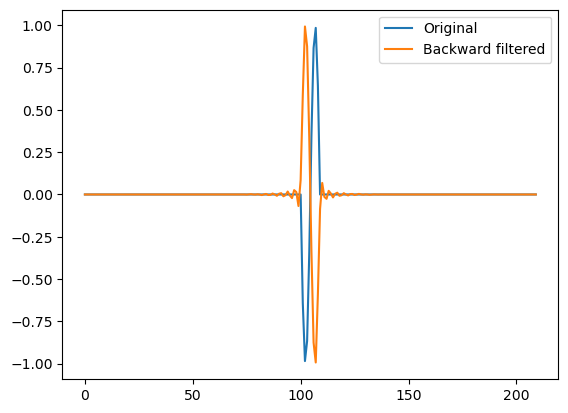

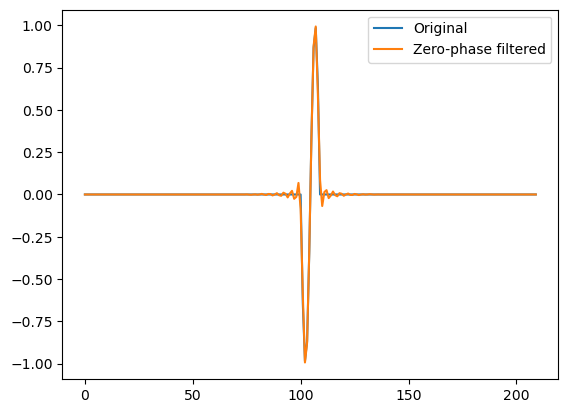

In [5]:
## apply a low-pass causal filter

# note: frequency listed as fraction of Nyquist (not sampling rate!)
fkern = signal.firwin(51,.6) # creates the kernal(it takes in order and frange
fdata = signal.lfilter(fkern,1,data) # it is a low-pass filter
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdata,label='Forward filtered')
plt.legend()
plt.show()

# flip the signal backwards
fdataFlip = fdata[::-1]
# and show its spectrum
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(data)),'ko-')
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(fdataFlip)),'r')
plt.xlim([0,.5])
plt.show()


# filter the flipped signal
fdataF = signal.lfilter(fkern,1,fdataFlip)
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdataF,label='Backward filtered')
plt.legend()
plt.show()

# finally, flip the double-filtered signal
fdataF = fdataF[::-1]
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdataF,label='Zero-phase filtered')
plt.legend()
plt.show()


In [25]:
fkern

array([ 5.48597263e-18,  1.05410336e-03, -7.67787795e-04, -9.54392499e-04,
        1.97209322e-03, -3.92310073e-18, -3.25879230e-03,  2.56333426e-03,
        3.22810272e-03, -6.50674501e-03,  9.29874229e-18,  9.80590189e-03,
       -7.35081480e-03, -8.86341834e-03,  1.72212187e-02, -1.59434007e-17,
       -2.47342346e-02,  1.83804833e-02,  2.22545137e-02, -4.41331630e-02,
        2.13190422e-17,  7.13255186e-02, -6.03083258e-02, -9.21312466e-02,
        3.01417551e-01,  5.99572200e-01,  3.01417551e-01, -9.21312466e-02,
       -6.03083258e-02,  7.13255186e-02,  2.13190422e-17, -4.41331630e-02,
        2.22545137e-02,  1.83804833e-02, -2.47342346e-02, -1.59434007e-17,
        1.72212187e-02, -8.86341834e-03, -7.35081480e-03,  9.80590189e-03,
        9.29874229e-18, -6.50674501e-03,  3.22810272e-03,  2.56333426e-03,
       -3.25879230e-03, -3.92310073e-18,  1.97209322e-03, -9.54392499e-04,
       -7.67787795e-04,  1.05410336e-03,  5.48597263e-18])

### Deeper explanation on firwin, numtaps(order), cutoff(frange):

Helped by Google Gemini:

The `scipy.signal.firwin()` function is used to design a Finite Impulse Response (FIR) filter. The two primary parameters, `numtaps` and `cutoff`, control the characteristics of this filter.

**`numtaps`:**

* **Definition:** This parameter specifies the number of taps, or coefficients, in the FIR filter. A higher number of taps generally leads to a more accurate filter, but also increases computational complexity.
* **Effect:** The number of taps determines the length of the filter's impulse response. A longer impulse response allows for a more precise filtering operation but can introduce latency in real-time applications.

**`cutoff`:**

* **Definition:** This parameter defines the normalized cutoff frequency, typically expressed as a fraction of the Nyquist frequency (half the sampling rate). It separates the passband (frequencies allowed to pass through) from the stopband (frequencies attenuated).
* **Effect:** A higher cutoff frequency results in a wider passband, allowing more high-frequency components to pass through. Conversely, a lower cutoff frequency results in a narrower passband, attenuating more high-frequency components.

**Example: `numtaps=51`, `cutoff=0.6`**

In this case, you're designing a 51-tap FIR filter with a normalized cutoff frequency of 0.6. This means that frequencies below 0.6 times the Nyquist frequency will be passed through, while frequencies above 0.6 times the Nyquist frequency will be attenuated. The filter will have a relatively sharp transition between the passband and stopband due to the moderate number of taps and cutoff frequency.

**Quiz:**

1. What is the purpose of the `numtaps` parameter in FIR filter design?
2. How does increasing the `cutoff` value affect the passband and stopband of a FIR filter?
3. If you want to design a FIR filter with a very sharp transition between the passband and stopband, would you increase or decrease the `numtaps` value?
4. Given the parameters `numtaps=51` and `cutoff=0.6`, approximately what percentage of the Nyquist frequency will be atte

### 3.  If you want to design a FIR filter with a very sharp transition between the passband and stopband, would you increase or decrease the `numtaps` value?
**To achieve a sharper transition between the passband and stopband in a FIR filter, you would increase the `numtaps` value.**

Here's why:

* **More taps = more degrees of freedom:** Increasing the number of taps allows the filter to approximate a more ideal frequency response, which typically has a steeper transition.
* **Improved approximation:** With more taps, the filter can better match the desired frequency response, including the sharp cutoff between passband and stopband.
* **Trade-off: computational complexity:** However, increasing `numtaps` also increases the computational complexity of the filter, so there's a balance between performance and efficiency.

Essentially, a larger `numtaps` value provides a more precise and detailed filter design, leading to a sharper tran
### 4.  Given the parameters `numtaps=51` and `cutoff=0.6`, approximately what percentage of the Nyquist frequency will be attenuated by the filter?s**The cutoff frequency of 0.6 means that approximately 60% of the Nyquist frequency will be attenuated by the filter.**

Here's the breakdown:

* **Nyquist frequency:** This is half the sampling rate, representing the highest frequency that can be accurately represented in a digital signal.
* **Cutoff frequency:** This is the frequency at which the filter starts to attenuate signals.
* **Attenuation:** Since the cutoff is at 0.6, frequencies above 60% of the Nyquist frequency will be attenuated.

Therefore, the filter will effectively block signals with frequencies above 60% of the sampling rate.
ition.
nuated by the filter?


# day 451, day 455

# Avoid Edge effects with reflection

## why edge effect happens?
* when you apply a kernel to a signal to filter it,(kernal is the weighted combination of data points in the original signal) there will be some edge effects meaning some disoriented signals at the end of the filtered signal.
* so to avoid having these filtered signals with edge effects we need to apply reflection technique.
* the reflection technique is about flipping (mirroring) the original signal both to left and right side of the original signal when filtering it.
* and finally cut off the reflected part of the filtered signal
* This technique would rid the filtered signal off of any distorted edges and transfer the distortion over to the reflected parts of the signal which we will eventually cut off.

## original signal:
![ssf](images/130924_sig.jpg)
## adding reflecting (flipped signal) to ends of the original signal:
![ssfs](images/130924_sig1.jpg)
* signals in those red-dashed boxes are the flipped versions of the original signal. they are mirror images.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy

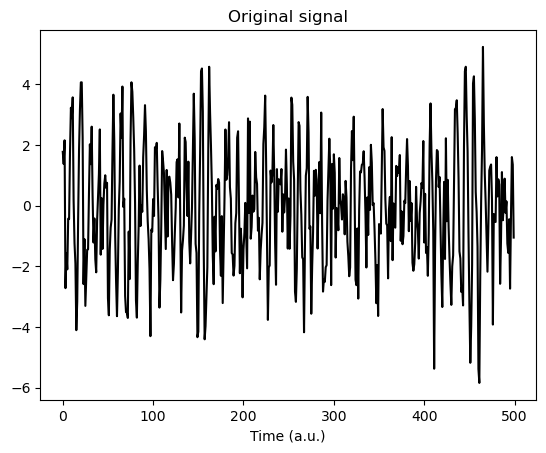

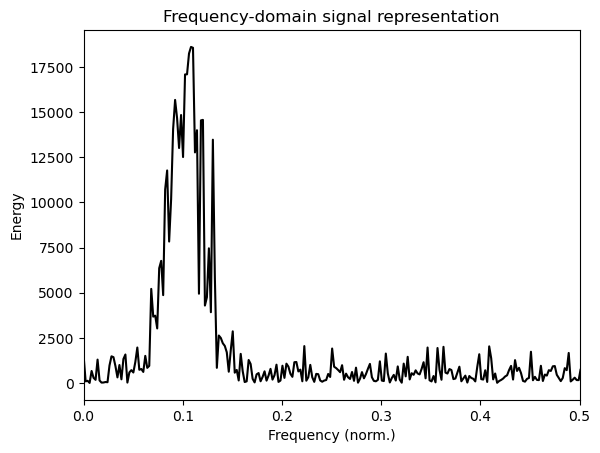

In [17]:
# create a signal
N  = 500
hz = np.linspace(0,1,N)
gx = np.exp( -(4*np.log(2)*(hz-.1)/.1)**2 )*N/2 # nyquist ready function
data = np.real(scipy.fftpack.ifft( gx*np.exp(1j*np.random.rand(N)*2*np.pi) ))
data = data + np.random.randn(N)

# plot it and its power spectrum
plt.plot(range(0,N),data,'k')
plt.title('Original signal')
plt.xlabel('Time (a.u.)')
plt.show()

plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k')
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency-domain signal representation')
plt.show()

## exploration, ablation-analysis and freethrows

### difference between fourier transform and inverse fourier transform


#### Fourier Transform and Inverse Fourier Transform: A Simplified Explanation

##### Fourier Transform
The Fourier transform is a mathematical tool that decomposes a function into a sum of sine and cosine functions. In simpler terms, it breaks down a complex signal into its constituent frequencies.

**Key points:**

* **Frequency domain:** Converts a function from the time domain to the frequency domain.
* **Decomposition:** Breaks down a signal into its constituent frequencies.
* **Sinusoidal components:** Represents a signal as a sum of sine and cosine wa##ves.

### Inverse Fourier Transform
The inverse Fourier transform is the reverse operation of the Fourier transform. It takes a function in the frequency domain and reconstructs the original function in the time domain.

**Key points:**

* **Time domain:** Converts a function from the frequency domain to the time domain.
* **Reconstruction:** Reassembles a signal from its frequency components.
* **Synthesis:** Creates the original signal by combining sine and cosine waves.

**In essence, the Fourier transform and inverse Fourier transform are like a pair of mathematical lenses that allow us to view a signal in two different perspectives: time a##nd frest your understanding.

**Question 1:**
What is the main purpose of the Fourier transform?

**Question 2:**
If you have a signal in the frequency domain, how can you obtain the original signal in the time domain?

**Question 3:**
What type of functions are used to represent a signal in the Fourier transform?

**Question 4:**
Are the Fourier transform and inverse Fourier transform reversible operations?

**Question 5:**
In which domain (time or frequency) is it easier to anal



yze the frequency content of a signal?


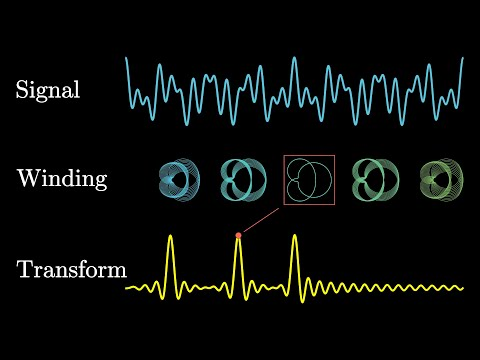

In [21]:
from IPython.display import YouTubeVideo

YouTubeVideo(id='spUNpyF58BY')

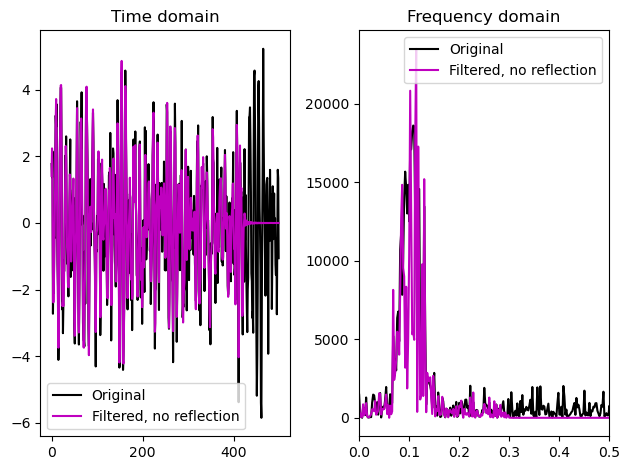

In [19]:
## apply a low-pass causal filter

# generate filter kernel
order = 151
fkern = signal.firwin(order,.6)

# zero-phase-shift filter
fdata = signal.lfilter(fkern,1,data) # forward (causal filter)
fdata = signal.lfilter(fkern,1,np.flip(fdata,0)) # reverse 
fdata = np.flip(fdata,0) # flip forward


# plot the original signal and filtered version
plt.subplot(121)
plt.plot(range(0,N),data,'k',label='Original')
plt.plot(range(0,N),fdata,'m',label='Filtered, no reflection')
plt.title('Time domain')
plt.legend()

# power spectra
plt.subplot(122)
plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k',label='Original')
plt.plot(hz,np.abs(scipy.fftpack.fft(fdata))**2,'m',label='Filtered, no reflection')
plt.title('Frequency domain')
plt.xlim([0,.5])
plt.legend()

plt.tight_layout()
plt.show()

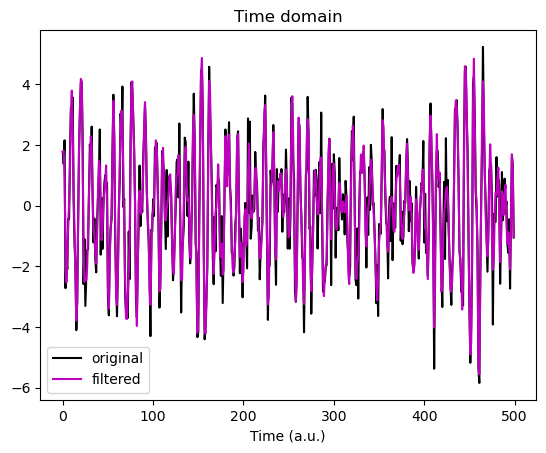

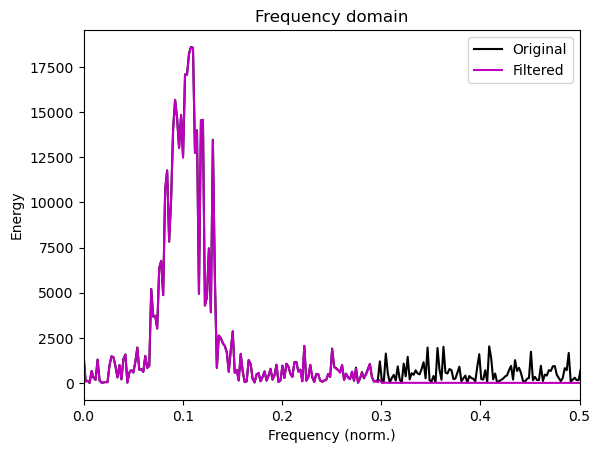

In [21]:
## now with reflection by filter order

# reflect the signal:
# data = np.concatenate((np.zeros(100),np.cos(np.linspace(np.pi/2,5*np.pi/2,10)),np.zeros(100)),axis=0)
reflectdata = np.concatenate( (data[order:0:-1],data,data[-1:-1-order:-1]) ,axis=0)

# zero-phase-shift filter on the reflected signal:
reflectdata = signal.lfilter(fkern,1,reflectdata)
reflectdata = signal.lfilter(fkern,1,reflectdata[::-1])
reflectdata = reflectdata[::-1]

# now chop off the reflected parts
fdata = reflectdata[order:-order]

# try again with filtfilt
fdata1 = signal.filtfilt(fkern,1,data)

# and plot
plt.plot(range(0,N),data,'k',label='original')
plt.plot(range(0,N),fdata,'m',label='filtered')
# plt.plot(range(0,N),fdata1,'b',label='filtered1')
plt.xlabel('Time (a.u.)')
plt.title('Time domain')
plt.legend()
plt.show()


# spectra
plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k',label='Original')
plt.plot(hz,np.abs(scipy.fftpack.fft(fdata))**2,'m',label='Filtered')
plt.legend()
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency domain')
plt.show()



## exploration, ablation-analysis and freethrows

In [28]:
len(data)

500

In [30]:
len(data[order:0:-1])

151

In [32]:
len(data[-1:-1-order:-1])

151

In [36]:
fdata[:10]

array([ 1.53001862,  1.11615445,  0.55140067,  0.50701486,  0.29728495,
       -0.71377634, -1.80947377, -2.32129017, -2.4559481 , -1.80969915])

In [38]:
fdata1[:10]

array([ 1.20518171,  1.21505495,  0.65140864,  0.36684431,  0.31406609,
       -0.61231142, -1.88753092, -2.35617671, -2.36190865, -1.8304929 ])

In [46]:
np.corrcoef(data,fdata1)[0,1]

0.9421150489026848

## conclusion:
* fdata and fdata1 seem to give proportional weights even thought the values are different the ultimate they shape they give off are identical.
* data and fdata have a strong correlation

# day 455, 460

## numtaps:
This parameter specifies the number of filter taps (coefficients). More taps generally lead to a sharper filter response, but also increase the computational complexity.
## cutoff:
This parameter specifies the cutoff frequency of the filter. It is normalized to the Nyquist frequency, which is half the sampling frequency.
## fs:
This parameter specifies the sampling frequency of the signal. It is used to convert the cutoff frequency from normalized units to Hz.
## window:
(Optional) This parameter specifies the window function to use. The default is the Hamming window, which provides a good balance between stopband attenuation and transition width.
## pass_zero:
(Optional) This parameter specifies whether the filter should pass DC (zero frequency) or not. The default is True, which means the filter is a low-pass filte

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import copy


In [64]:
# parameters:
dataN = 10000
order = 5001

# generate data:
signal1 = np.random.randn(dataN)

# create filter kernel:
fkern = signal.firwin(order,.01,pass_zero=True)

# apply filter kernel to data:
fdata = signal.filtfilt(fkern,1,signal1)


ValueError: The length of the input vector x must be greater than padlen, which is 15003.

* the error is due to the fact that the algorithm checks if the signal is atleast 3 times the length of the order if it is not it throws up the error so that our output is without any edge effect because in order for the output to not have edge effect the original signal must be atleast of size > 3*order_length.


In [68]:
np.corrcoef(signal1,fdata)[0,1]

0.08318445743181599

In [66]:
# reflect the signal (this makes the signal become atleast 3times the length of the order)
signalRefl = np.concatenate( (signal1[::-1],signal1,signal1[-1:-1-order:-1]),axis=0 ) 

# apply filter kernel to data
fdataR = signal.filtfilt(fkern,1,signalRefl)

# and cut off edges
fdata = fdataR[dataN:-dataN] # extracting only the middle part


## exploration, ablation-analysis and freethrows

In [86]:
signal1.shape,fdataR.shape,fdata.shape

((10000,), (10501,), (0,))

In [29]:
a = np.random.randint(1,9,10)
a

array([2, 5, 4, 7, 4, 6, 2, 1, 6, 6])

In [31]:
a[::-1]

array([6, 6, 1, 2, 6, 4, 7, 4, 5, 2])

In [33]:
a[-1:-1-5:-1]

array([6, 6, 1, 2, 6])

In [37]:
len(signal1[::-1])

10000

In [39]:
len(signal1[-1:-order-1:-1])

5001

In [43]:
len(signalRefl)

25001

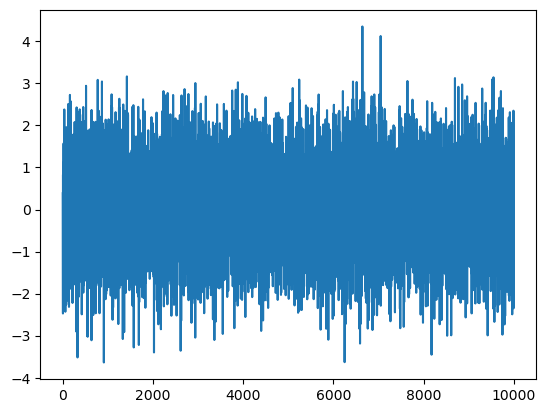

In [68]:
# how does our look like?
plt.plot(signal1)

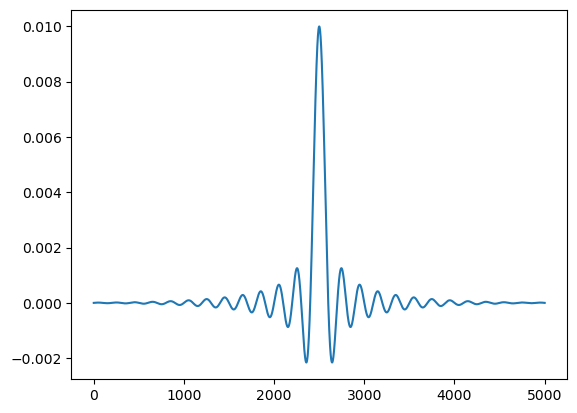

In [70]:
# how does our kernel look like
plt.plot(fkern);

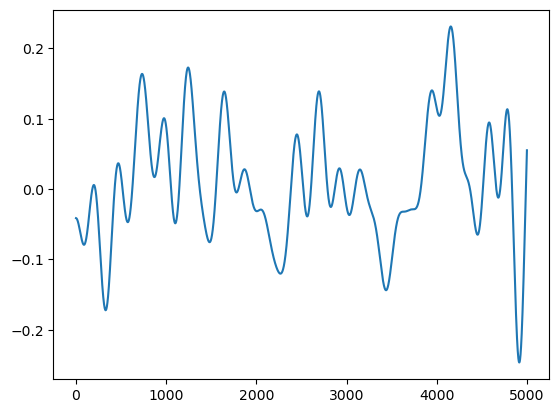

In [72]:
# how does our f data look like
plt.plot(fdata);

# day 461

# Low pass filter

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy

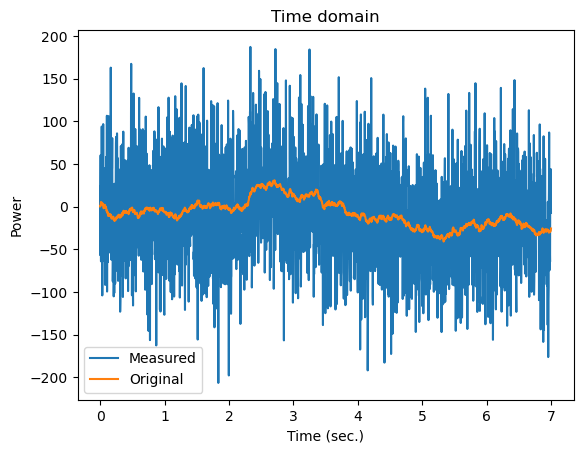

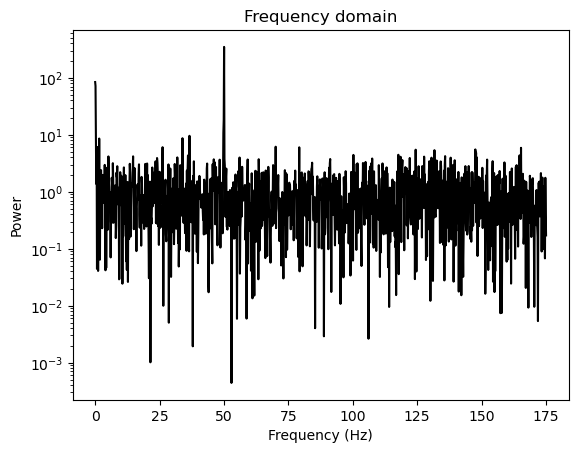

In [17]:
# simulation parameters
fs      = 350 # hz
timevec = np.arange(0,fs*7-1)/fs
npnts   = len(timevec)

# generate signal
yOrig = np.cumsum(np.random.randn(npnts)) # this is called brownian noise.
y     = yOrig + 50*np.random.randn(npnts) + 40*np.sin(2*np.pi*50*timevec) # we have added some white noise to the original signal

# power spectrum of signal
yX = np.abs(scipy.fftpack.fft(y)/npnts)**2 # power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1)) # nyquist frequency


# plot the data:
plt.plot(timevec,y,label='Measured')
plt.plot(timevec,yOrig,label='Original')
plt.xlabel('Time (sec.)')
plt.ylabel('Power')
plt.title('Time domain')
plt.legend()
plt.show()

# plot its power spectrum
plt.plot(hz,yX[0:len(hz)],'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.yscale('log')
plt.show()

In [19]:
npnts

2449

In [25]:
npnts/2

1224.5

In [23]:
len(hz)

1225

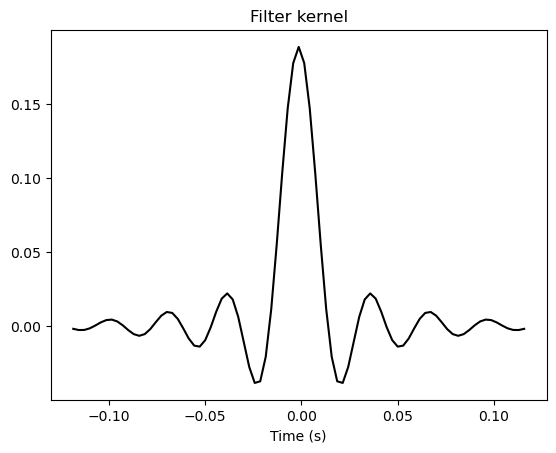

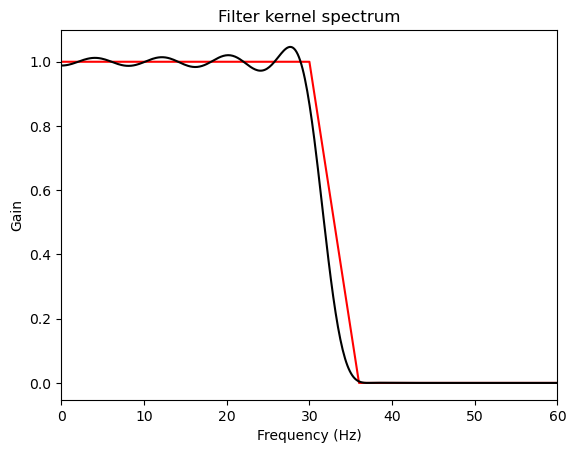

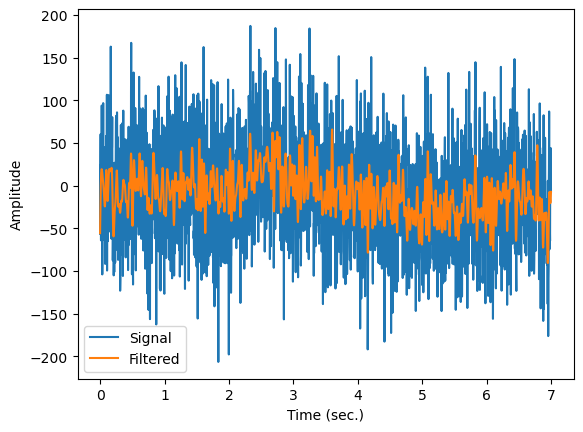

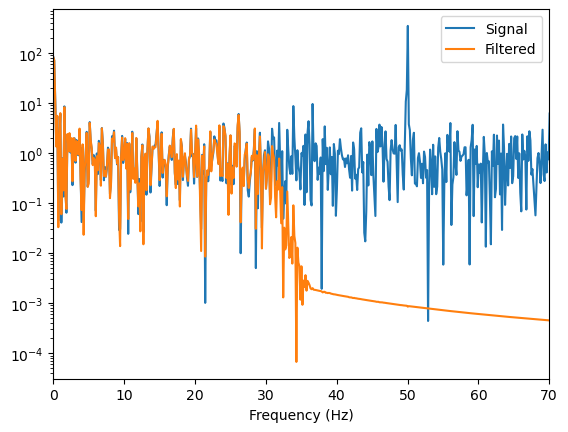

In [43]:
## now for lowpass filter

fcutoff = 30
transw  = .20
order   = np.round( 7*fs/fcutoff )+1

shape   = [ 1,1,0,0 ]
frex    = [ 0, fcutoff, fcutoff+fcutoff*transw, fs/2 ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=fs)

# its power spectrum
filtkernX = np.abs(scipy.fftpack.fft(filtkern,npnts))**2



plt.plot(np.arange(-order/2,order/2)/fs,filtkern,'k')
plt.xlabel('Time (s)')
plt.title('Filter kernel')
plt.show()

plt.plot(np.array(frex),shape,'r')
plt.plot(hz,filtkernX[:len(hz)],'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Filter kernel spectrum')
plt.show()


### now apply the filter to the data(zero phase filter)
yFilt = signal.filtfilt(filtkern,1,y)

plt.plot(timevec,y,label='Signal')
plt.plot(timevec,yFilt,label='Filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

### power spectra of original and filtered signal
yOrigX = np.abs(scipy.fftpack.fft(y)/npnts)**2
yFiltX = np.abs(scipy.fftpack.fft(yFilt)/npnts)**2

plt.plot(hz,yOrigX[:len(hz)],label='Signal')
plt.plot(hz,yFiltX[:len(hz)],label='Filtered')
plt.xlim([0,fs/5])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.show()

In [37]:
order

83.0

In [31]:
frex

[0, 30, 36.0, 175.0]

# day 550

# windowed-sinc filters

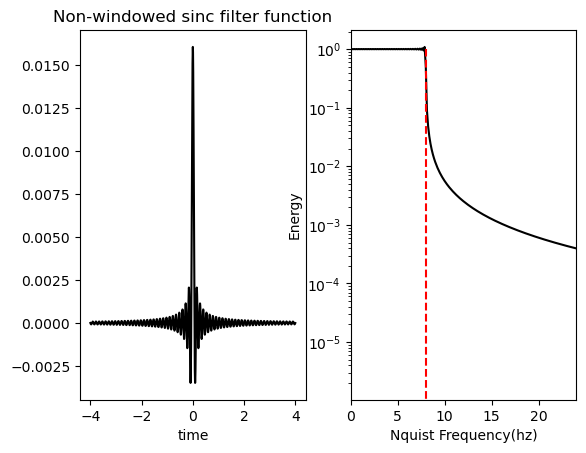

In [28]:
# simulation params
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import copy
from scipy import signal

srate = 1000
time  = np.arange(-4,4,1/srate)
pnts  = len(time)

# create a sinc function
f = 8
sinc_filt = np.sin(2*np.pi*f*time)/time

# adjust NaN and normalize the filter to unit length
sinc_filt[~np.isfinite(sinc_filt)] = np.max(sinc_filt)
sinc_filt = sinc_filt/sum(sinc_filt)

# plotting the sinc_filt
plt.subplot(121)
plt.plot(time,sinc_filt,'k')
plt.xlabel('time')
plt.title('Non-windowed sinc filter function')

# plotting the power spectrum of the sincfilt
plt.subplot(122)
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1)) # nquist frequency(the threshold until which you can successfully model the actual signal)
pw = np.abs(scipy.fftpack.fft(sinc_filt))
plt.plot(hz,pw[:len(hz)],'k')
plt.xlim([0,f*3])
plt.yscale('log')
plt.plot([f,f],[0,1],'r--')
plt.xlabel('Nquist Frequency(hz)')
plt.ylabel('Energy')
plt.show()


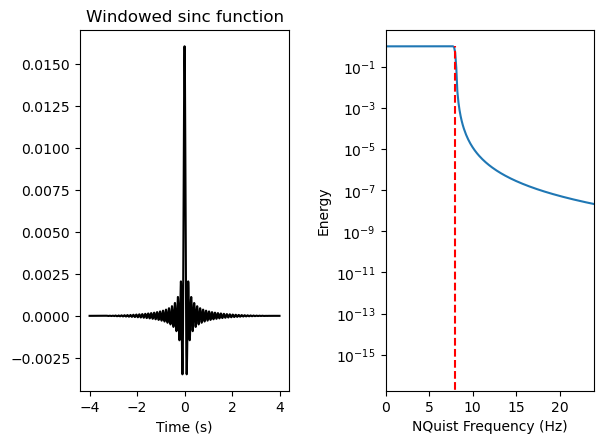

In [30]:
# create windowed sinc filter
Wsincfilt = sinc_filt * np.hanning(pnts)

# now plot the windowed sinc filter
plt.subplot(121)
plt.plot(time,Wsincfilt,'k')
plt.xlabel('Time (s)')
plt.title('Windowed sinc function')

plt.subplot(122)
pw = np.abs(scipy.fftpack.fft(Wsincfilt))
plt.plot(hz,pw[:len(hz)])
plt.xlim([0,f*3])
plt.yscale('log')
plt.plot([f,f],[0,1],'r--')
plt.xlabel('NQuist Frequency (Hz)')
plt.ylabel('Energy')
plt.tight_layout(pad=2)
plt.show()